### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set(color_codes=True)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
df_rating = pd.read_csv('Data.csv') 
df_movie = pd.read_csv('item.csv')
df_user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

<font color=blue>**Movie Rating Dataset Analysis**</font>


In [5]:
df_rating.head(3)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [7]:
df_rating.shape

(100000, 4)

In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
df_rating['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
df_rating.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [17]:
df_rating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

<font color=blue>**Movie Dataset Analysis**</font>

In [19]:
df_movie.head(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df_movie.shape

(1681, 22)

In [21]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [22]:
df_movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [23]:
df_movie.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [25]:
df_movie.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

<font color=blue>**User Dataset Analysis**</font>

In [26]:
df_user.head(3)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [27]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [29]:
df_user.shape

(943, 5)

In [30]:
df_user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [32]:
df_user['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [34]:
df_user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [36]:
df_movie.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [51]:
df_movie[['unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir','Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 
          'War', 'Western']].sum().reset_index().rename(columns={'index':'Genre',0:'Movie_Count'})

,Genre,Movie_Count
0,unknown,1
1,Action,251
2,Adventure,135
3,Animation,42
4,Childrens,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [5]:
filt = df_movie['unknown']==1
#df_movie[filt]

In [6]:
df_movie1 = df_movie[~filt].copy()

*New dataframe without unknown genre is : df_movie1*

In [7]:
#New dataframe without unknown genre is : df_movie1
df_movie1.shape

(1680, 22)

### 6. Find the movies that have more than one genre - 5 marks**

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)


In [10]:
df_movie1['No_Of_Genre']=df_movie1[['Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir','Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 
          'War', 'Western']].sum(axis=1)

In [11]:
df_movie1[df_movie1['No_Of_Genre']>1][['movie title','No_Of_Genre']].sort_values(by='No_Of_Genre',ascending=False).head()

,movie title,No_Of_Genre
171,"Empire Strikes Back, The",6
558,"Kid in King Arthur's Court, A",6
424,"Transformers: The Movie, The",6
753,Jumanji,5
16,From Dusk Till Dawn,5


In [12]:
#Total number of movies which have more than one genres
print ("Total Number of movies having more than 1 genre :", str(df_movie1[df_movie1['No_Of_Genre']>1].shape[0]))

Total Number of movies having more than 1 genre : 849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [316]:
df_rating['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

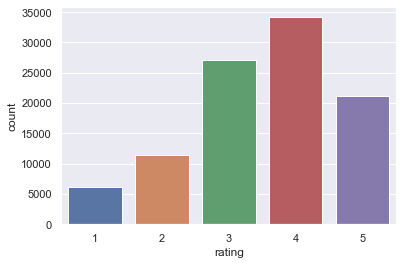

In [315]:
#Univariate plot of rating
sns.countplot(df_rating['rating']);

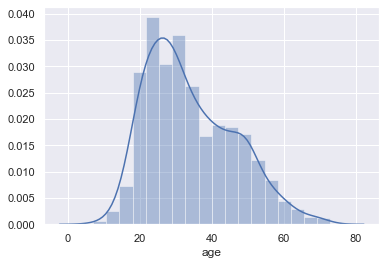

In [129]:
#Univariate plot of age
sns.distplot(df_user['age']);

In [287]:
df1 = df_movie['release date'].str[7:].reset_index()

df1 = df1.groupby('release date').size().sort_values(ascending=False).reset_index().rename(columns={'release date':'Release_Year',0:'Count'})
df1.head(10)

,Release_Year,Count
0,1996,355
1,1997,286
2,1995,219
3,1994,214
4,1993,126
5,1998,65
6,1992,37
7,1990,24
8,1991,22
9,1986,15


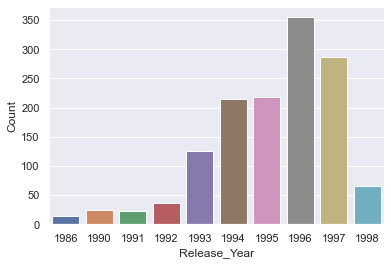

In [299]:
#Univariate plot of Release Year
sns.barplot(df1['Release_Year'].head(10),df1['Count']);

In [305]:
df_user['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

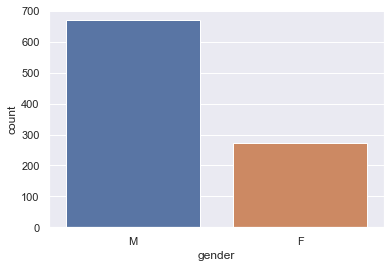

In [307]:
##Univariate plot of gender
sns.countplot(df_user['gender'])

In [311]:
df_user['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

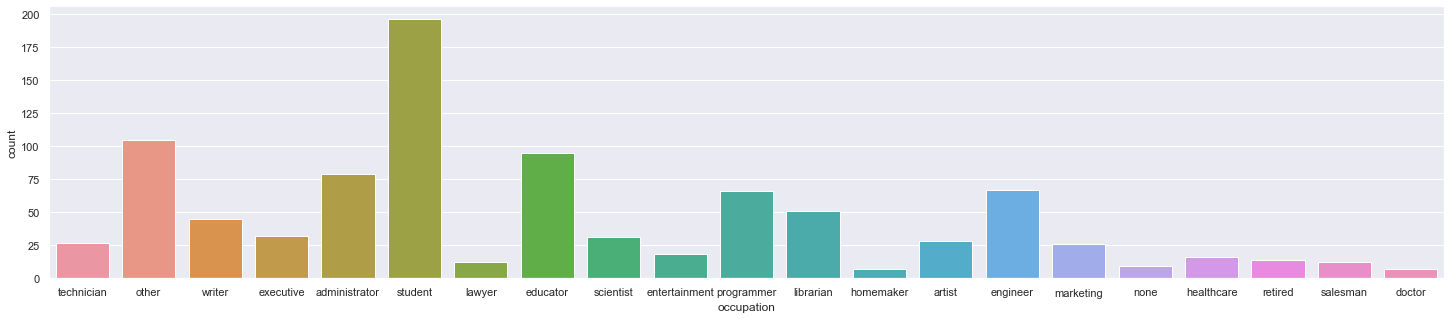

In [313]:
fig,ax=plt.subplots(figsize=(25,5))
sns.countplot(df_user['occupation'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [381]:
#Create field Release_Year and add to dataframe
import datetime as dt
df_m = df_movie.copy()
df_m['release date'] = df_m['release date'].apply(lambda x:dt.datetime.strptime(x,'%d-%b-%Y'))
#df_m.info()
df_m['Release_Year'] = df_m['release date'].apply(lambda x:x.strftime('%Y'))
df_m.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Release_Year'],
      dtype='object')

In [382]:
#Get number of movies in every genre for all years
df_m1 = df_m[['Release_Year','Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].groupby('Release_Year').sum()

In [383]:
df_m1.head(2)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Release_Year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [384]:
#Add "Total" movies released in a year to dataframe 
df_m1 = pd.concat([df_m1,df_m.groupby('Release_Year').size()],axis=1).rename(columns={0:'Total'})

In [385]:
df_m1.tail(2)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Release_Year,,,,,,,,,,,,,,,,,,,
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,286
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0,65


In [387]:
df_m2=df_m1.copy()
for i in df_m1.columns:
    df_m2[i] = df_m1[i]/df_m1['Total'] * 100

In [390]:
df_m2.drop('Total',axis=1,inplace=True)
df_m2.tail(2)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Release_Year,,,,,,,,,,,,,,,,,,
1997,16.083916,6.993007,1.048951,7.692308,30.41958,10.489510,2.097902,39.510490,1.398601,0.699301,2.797203,1.748252,6.293706,17.832168,4.545455,18.881119,4.895105,0.0
1998,18.461538,4.615385,0.000000,1.538462,20.00000,10.769231,4.615385,50.769231,1.538462,3.076923,6.153846,1.538462,4.615385,16.923077,7.692308,27.692308,0.000000,0.0


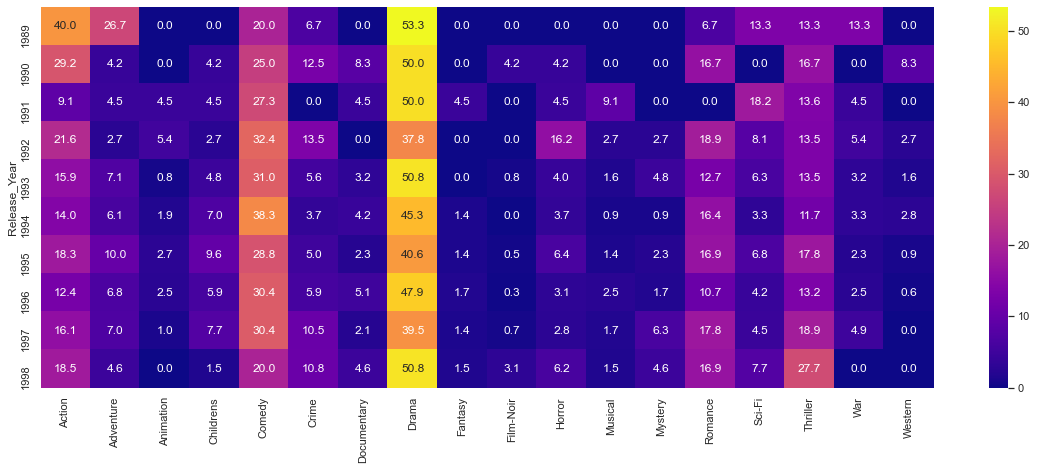

In [396]:
fig,ax=plt.subplots(figsize=(20,7))

sns.heatmap(df_m2.tail(10),annot=True,cmap='plasma',fmt='0.1f');

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [416]:
df_r1 = df_rating.groupby('movie id').size().reset_index().rename(columns={0:'Count_Rating'})

In [420]:
df_r2 = df_rating.groupby('movie id').mean()['rating'].reset_index().rename(columns={'rating':'Average_Rating'})
df_r2

,movie id,Average_Rating
0,1,3.878319
1,2,3.206107
2,3,3.033333
3,4,3.550239
4,5,3.302326
...,...,...
1677,1678,1.000000
1678,1679,3.000000
1679,1680,2.000000
1680,1681,3.000000


In [425]:
df_r3=pd.merge(df_r1,df_r2,on='movie id',how='inner')
df_r4 = df_r3[df_r3['Count_Rating']>100].sort_values(by='Average_Rating',ascending=False).head(25)

In [429]:
pd.merge(df_r4,df_movie,on='movie id',how='inner')[['movie id','movie title','Count_Rating','Average_Rating']]

,movie id,movie title,Count_Rating,Average_Rating
0,408,"Close Shave, A",112,4.491071
1,318,Schindler's List,298,4.466443
2,169,"Wrong Trousers, The",118,4.466102
3,483,Casablanca,243,4.456790
4,64,"Shawshank Redemption, The",283,4.445230
5,603,Rear Window,209,4.387560
6,12,"Usual Suspects, The",267,4.385768
7,50,Star Wars,583,4.358491
8,178,12 Angry Men,125,4.344000
9,134,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [433]:
df_10 = pd.merge(df_user,pd.merge(df_movie,df_rating, on='movie id', how='inner'),on='user id', how='inner')

In [451]:
df_11=df_10 [['gender','unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].groupby('gender').sum()
df_11

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [453]:
df_12=df_10 [['gender','rating']].groupby('gender').size()
df_12

gender
F    25738
M    74253
dtype: int64

In [455]:
df_13 = pd.concat([df_11,df_12], axis=1).rename(columns={0:'Total_Rating'})
df_13

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total_Rating
gender,,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74253


In [473]:
df_14=df_13.copy()
for i in df_14.columns:
    df_14[i] = (df_14[i]/df_14['Total_Rating'])*100
df_14.reset_index(inplace=True)


In [474]:
df_14[['gender','Drama','Sci-Fi','Romance']]

,gender,Drama,Sci-Fi,Romance
0,F,42.769446,10.214469,22.760121
1,M,38.903479,13.603491,18.319799


**Women watch more drama than men<br>
Men watch more Sci-Fi than women<br>
Women watch more Romance than men**